In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Load dataset
df = pd.read_csv("../../reviews_data_cleaned.csv")

In [4]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,cleaned_reviews
0,gp:AOqpTOF2pFouoTzaY889tNmGv4zN9newhheNzv2-zBP...,Alex Kway,https://play-lh.googleusercontent.com/a-/AOh14...,super,5,0,5.213.1,2021-03-30 01:20:47,NaN,NaN,super
1,gp:AOqpTOHLnSuiDefTW6tSLESFxMipQ_xC4lqFoqudq-V...,RL,https://play-lh.googleusercontent.com/-e1DJGr_...,They literally ask you to pay for everything. ...,1,1,5.213.1,2021-03-30 01:11:38,NaN,NaN,they liter ask you to pay for everyth you can ...
2,gp:AOqpTOGtIfjFtXHRSxxzGzRCDAc_t0SRtm41FIF8x-E...,Viktoria,https://play-lh.googleusercontent.com/-vFF7--v...,I cancelled subscription on the second day aft...,1,1,NaN,2021-03-30 00:57:33,NaN,NaN,cancel subscript on second day after paid they...
3,gp:AOqpTOGHg_7dUptybABL1NSUmtQL0jIOWzdGEcB0fzJ...,Tournel Henry,https://play-lh.googleusercontent.com/a-/AOh14...,A dating app that favours one gender over the ...,1,1,5.213.1,2021-03-30 00:48:36,NaN,NaN,date app that favour one gender over other in ...
4,gp:AOqpTOEly8JKjN4pYT8_lqX4ogea84YEcnnuqHZtfN5...,wolf man,https://play-lh.googleusercontent.com/a-/AOh14...,If your geting notifications that you got a li...,5,1,5.213.1,2021-03-30 00:21:00,NaN,NaN,if your gete notif that you got like go to you...


In [5]:
print(df.shape)
print(df.info())

(81978, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81978 entries, 0 to 81977
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              81978 non-null  object
 1   userName              81978 non-null  object
 2   userImage             81978 non-null  object
 3   content               81974 non-null  object
 4   score                 81978 non-null  int64 
 5   thumbsUpCount         81978 non-null  int64 
 6   reviewCreatedVersion  70382 non-null  object
 7   at                    81978 non-null  object
 8   replyContent          39555 non-null  object
 9   repliedAt             39555 non-null  object
 10  cleaned_reviews       81638 non-null  object
dtypes: int64(2), object(9)
memory usage: 6.9+ MB
None


In [7]:
## Convert date objects to datetime
df["at"] = pd.to_datetime(df["at"])

In [12]:
df["day"] = df["at"].dt.date

In [13]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,cleaned_reviews,day
0,gp:AOqpTOF2pFouoTzaY889tNmGv4zN9newhheNzv2-zBP...,Alex Kway,https://play-lh.googleusercontent.com/a-/AOh14...,super,5,0,5.213.1,2021-03-30 01:20:47,NaN,NaN,super,2021-03-30
1,gp:AOqpTOHLnSuiDefTW6tSLESFxMipQ_xC4lqFoqudq-V...,RL,https://play-lh.googleusercontent.com/-e1DJGr_...,They literally ask you to pay for everything. ...,1,1,5.213.1,2021-03-30 01:11:38,NaN,NaN,they liter ask you to pay for everyth you can ...,2021-03-30
2,gp:AOqpTOGtIfjFtXHRSxxzGzRCDAc_t0SRtm41FIF8x-E...,Viktoria,https://play-lh.googleusercontent.com/-vFF7--v...,I cancelled subscription on the second day aft...,1,1,NaN,2021-03-30 00:57:33,NaN,NaN,cancel subscript on second day after paid they...,2021-03-30
3,gp:AOqpTOGHg_7dUptybABL1NSUmtQL0jIOWzdGEcB0fzJ...,Tournel Henry,https://play-lh.googleusercontent.com/a-/AOh14...,A dating app that favours one gender over the ...,1,1,5.213.1,2021-03-30 00:48:36,NaN,NaN,date app that favour one gender over other in ...,2021-03-30
4,gp:AOqpTOEly8JKjN4pYT8_lqX4ogea84YEcnnuqHZtfN5...,wolf man,https://play-lh.googleusercontent.com/a-/AOh14...,If your geting notifications that you got a li...,5,1,5.213.1,2021-03-30 00:21:00,NaN,NaN,if your gete notif that you got like go to you...,2021-03-30


<AxesSubplot:ylabel='score'>

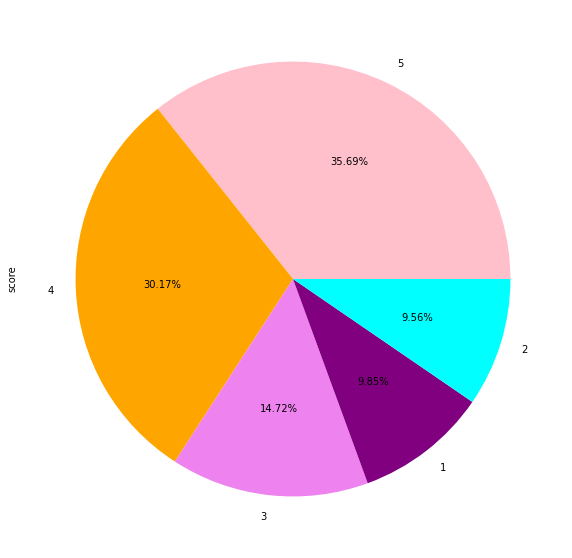

In [14]:
## Distribution of reviews
# checking different labels for reviews in reviews by courses

plt.rcParams['figure.figsize'] = (18, 10)

plt.subplot(1, 1, 1)
df['score'].value_counts().plot.pie(colors = ['pink', 'orange', 'violet', 'purple', 'cyan'],
                                                labels = ["5", "4", "3", "1", "2"],
                                                autopct = '%.2f%%')

<AxesSubplot:xlabel='day'>

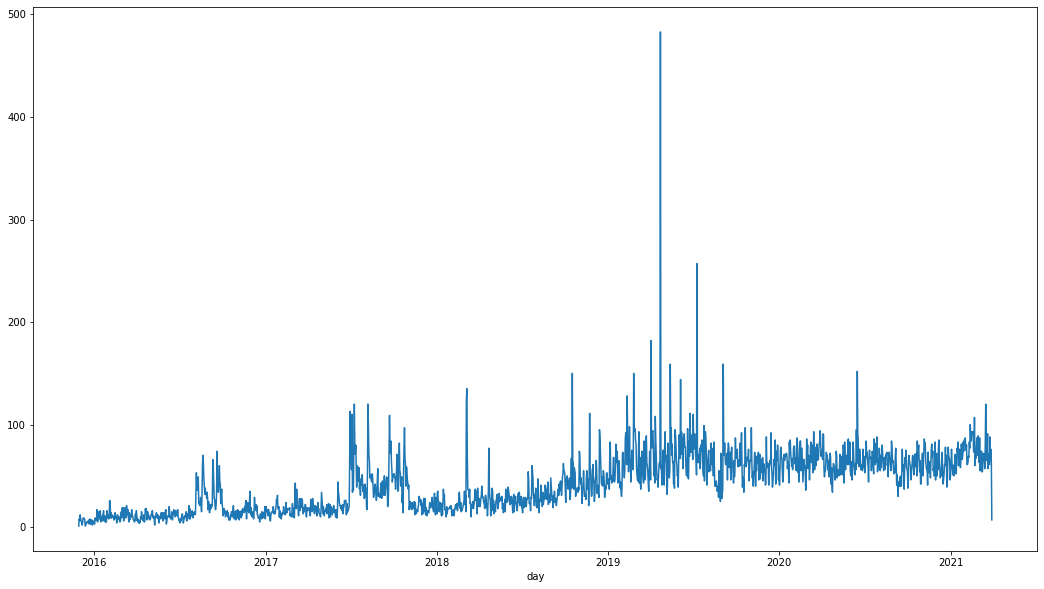

In [22]:
## Number of reviews per day
plt.figure()
df.groupby("day")["reviewId"].nunique().plot()

- We have some outlier events where the number of reviews was extremely large
- This outlier events are important because they might be connected to some movements in stock prices

<AxesSubplot:xlabel='day'>

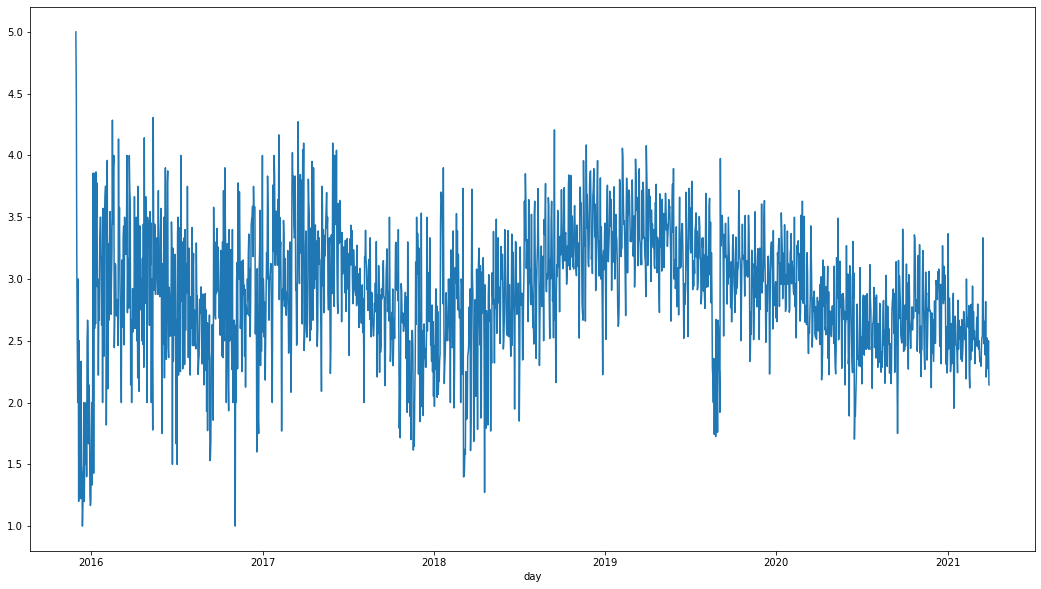

In [16]:
## Evolution of average ratings over time
plt.figure()
df.groupby("day")["score"].mean().plot()

In [38]:
## Have to smooth the mean over time
df["month"] = df["at"].dt.month
df["year"] = df["at"].dt.year
x = df.groupby(["year","month"],as_index=False)["score"].mean().sort_values(["year","month"])

In [40]:
from datetime import datetime

In [43]:
x["dummy_date"] = x.apply(lambda x:datetime(int(x["year"]), int(x["month"]),1).date(),axis=1)

<AxesSubplot:xlabel='dummy_date'>

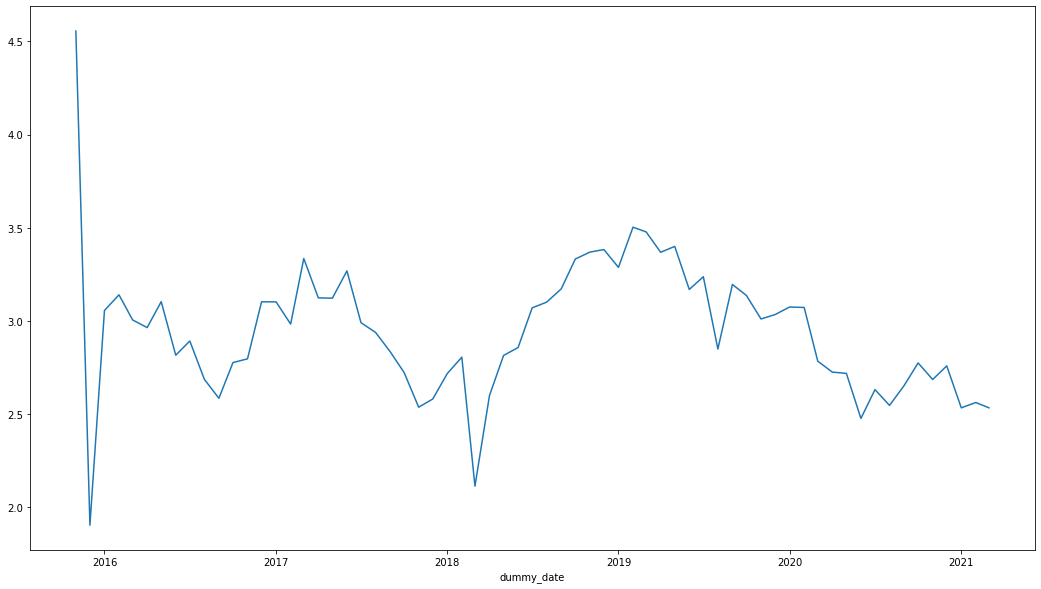

In [45]:
x.set_index("dummy_date")["score"].plot()

In [46]:
## Analysis on words used in the reviews
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,cleaned_reviews,day,month,year
0,gp:AOqpTOF2pFouoTzaY889tNmGv4zN9newhheNzv2-zBP...,Alex Kway,https://play-lh.googleusercontent.com/a-/AOh14...,super,5,0,5.213.1,2021-03-30 01:20:47,NaN,NaN,super,2021-03-30,3,2021
1,gp:AOqpTOHLnSuiDefTW6tSLESFxMipQ_xC4lqFoqudq-V...,RL,https://play-lh.googleusercontent.com/-e1DJGr_...,They literally ask you to pay for everything. ...,1,1,5.213.1,2021-03-30 01:11:38,NaN,NaN,they liter ask you to pay for everyth you can ...,2021-03-30,3,2021
2,gp:AOqpTOGtIfjFtXHRSxxzGzRCDAc_t0SRtm41FIF8x-E...,Viktoria,https://play-lh.googleusercontent.com/-vFF7--v...,I cancelled subscription on the second day aft...,1,1,NaN,2021-03-30 00:57:33,NaN,NaN,cancel subscript on second day after paid they...,2021-03-30,3,2021
3,gp:AOqpTOGHg_7dUptybABL1NSUmtQL0jIOWzdGEcB0fzJ...,Tournel Henry,https://play-lh.googleusercontent.com/a-/AOh14...,A dating app that favours one gender over the ...,1,1,5.213.1,2021-03-30 00:48:36,NaN,NaN,date app that favour one gender over other in ...,2021-03-30,3,2021
4,gp:AOqpTOEly8JKjN4pYT8_lqX4ogea84YEcnnuqHZtfN5...,wolf man,https://play-lh.googleusercontent.com/a-/AOh14...,If your geting notifications that you got a li...,5,1,5.213.1,2021-03-30 00:21:00,NaN,NaN,if your gete notif that you got like go to you...,2021-03-30,3,2021


<AxesSubplot:>

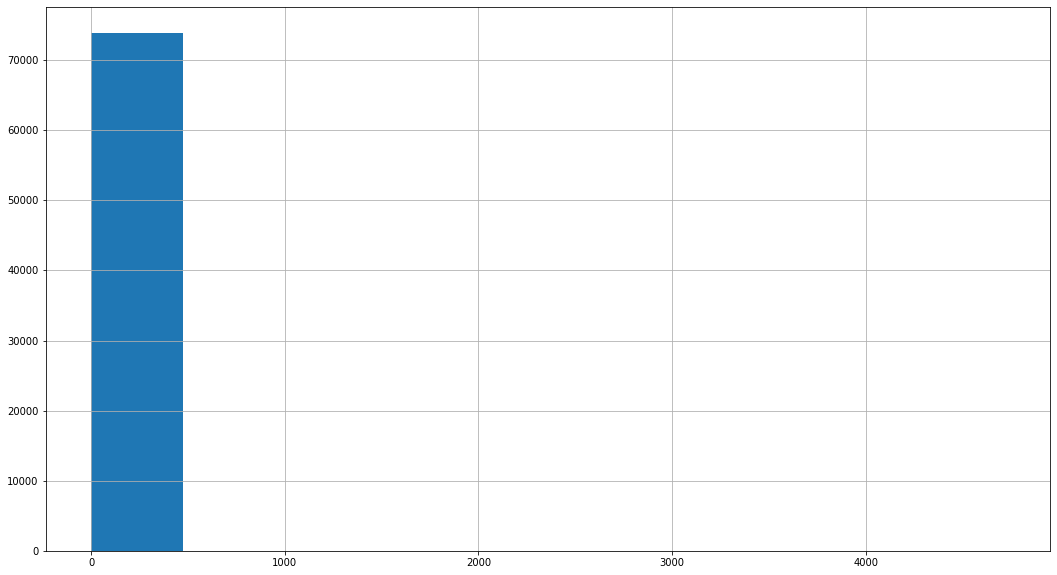

In [47]:
## Are there users who put multiple reviews
df["userName"].value_counts().hist()

In [48]:
df["userName"].value_counts()

A Google user       4715
Matt                  24
Michael               23
Chris                 22
J                     21
                    ... 
Dee's Nutts            1
TheRoboduncle          1
Iman Pourlotfali       1
Sajjad Khiavi          1
florida001             1
Name: userName, Length: 73872, dtype: int64

In [51]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'cleaned_reviews', 'day', 'month', 'year'],
      dtype='object')

In [56]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

Text(0.5, 1.0, 'Reviews for 5 stars')

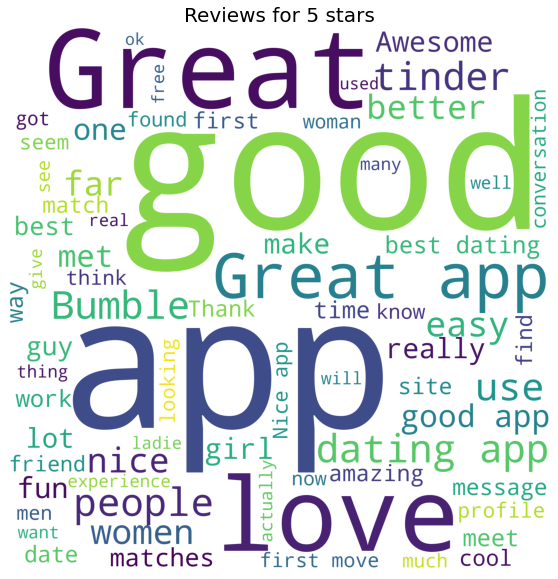

In [64]:
## Word frequency count

df_not_null = df[~(df["content"].isnull())]
label1 = ' '.join([text for text in df_not_null['content'][df_not_null['score'] == 5]])

wordcloud = WordCloud(background_color = 'white',width = 2000, height = 2000, max_words = 70).generate(label1)
plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reviews for 5 stars', fontsize = 20)

Text(0.5, 1.0, 'Reviews for 1 stars')

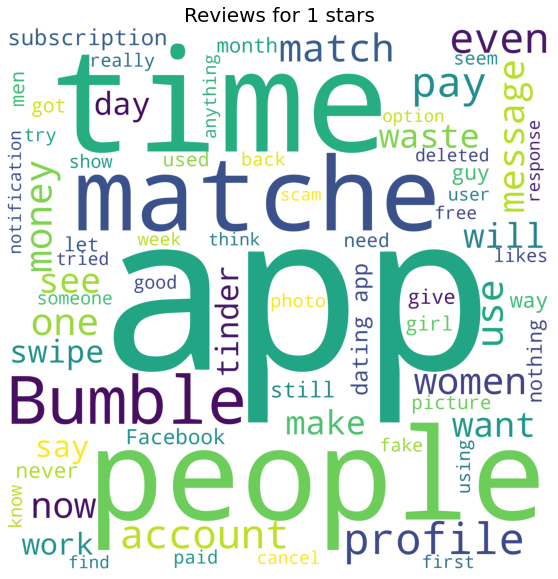

In [66]:
label2 = ' '.join([text for text in df_not_null['content'][df_not_null['score'] == 1]])

wordcloud = WordCloud(background_color = 'white',width = 2000, height = 2000, max_words = 70).generate(label2)
plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reviews for 1 stars', fontsize = 20)

In [67]:
## Correlation between reviews and no of reviews
df["dummy_date"] = df.apply(lambda x:datetime(int(x["year"]), int(x["month"]),1).date(),axis=1)
no_reviews = df.groupby("dummy_date")["reviewId"].nunique()
average_reviews = df.groupby("dummy_date")["score"].mean()

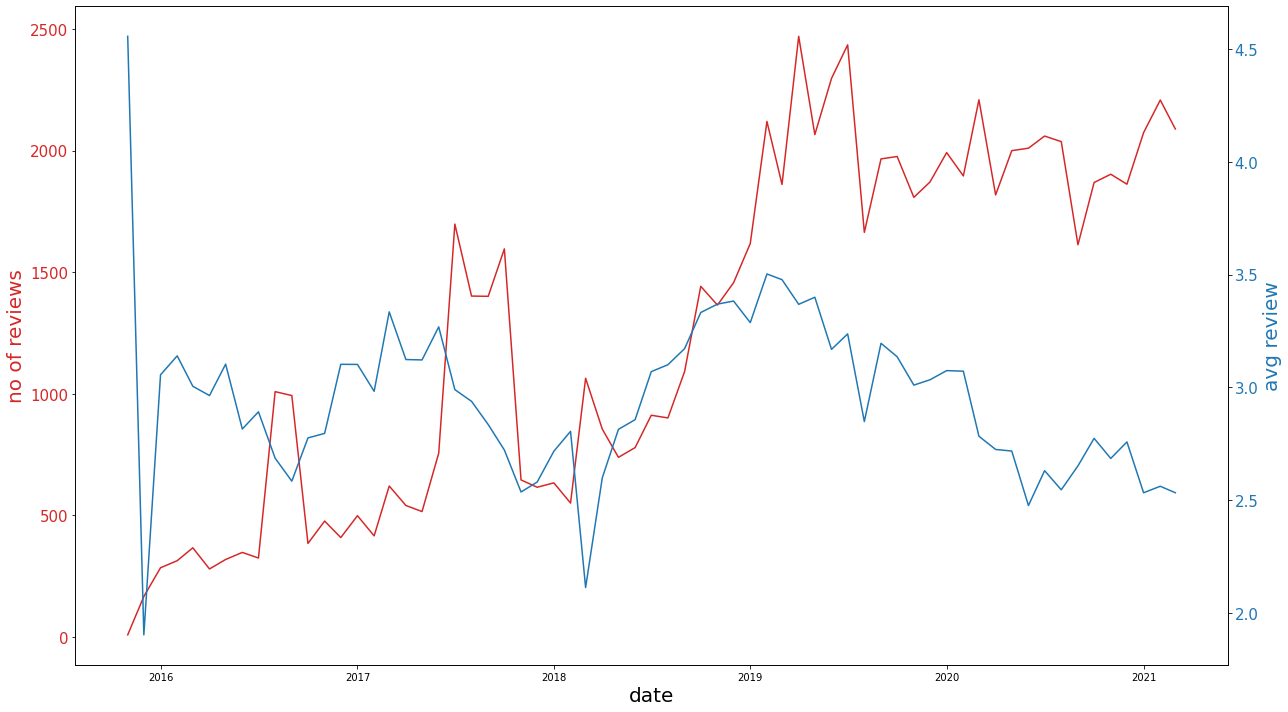

In [82]:

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('date', fontsize=20)
ax1.set_ylabel('no of reviews', color=color, fontsize=20)
ax1.plot(no_reviews.index.to_list(),no_reviews.values, color=color)
ax1.tick_params(axis='y', labelcolor=color,labelsize=15)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('avg review', color=color,  fontsize=20)  # we already handled the x-label with ax1
ax2.plot(average_reviews.index.to_list(), average_reviews.values, color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [84]:
print("Correlation between no of reviews and avg reviews",np.corrcoef(average_reviews, no_reviews)[1][0])

Correlation between no of reviews and avg reviews -0.0341661322155686


In [109]:
## Associate positivity, negativity to words
## Take extreme classes
df_not_null = df[~df["cleaned_reviews"].isnull()]
pos = df_not_null[df_not_null["score"]==5]
neg = df_not_null[df_not_null["score"].isin([1,2])]

print("distribution of positive reviews",pos.shape[0])
print("distribution of negative reviews",neg.shape[0])

distribution of positive reviews 24498
distribution of negative reviews 37292


In [91]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [92]:
test = pos["cleaned_reviews"].iloc[1]
print(test)
print(word_tokenize(test))

if your gete notif that you got like go to your filter and turn them off that is why
['if', 'your', 'gete', 'notif', 'that', 'you', 'got', 'like', 'go', 'to', 'your', 'filter', 'and', 'turn', 'them', 'off', 'that', 'is', 'why']


In [110]:
## Tokenize individual reviews
stopwords_english = stopwords.words('english')
def preprocess_reviews(review, stopwords):
    # remove stopwords
    # tokenize
    review = word_tokenize(review)
    review_clean = []

    for word in review: # Go through every word in your tokens list
        if word in stopwords:  # remove stopwords
            pass
        else:
            review_clean.append(word)
    return review_clean

In [111]:
print(preprocess_reviews(test,stopwords_english))

['gete', 'notif', 'got', 'like', 'go', 'filter', 'turn']


In [118]:
# Create a frequency table
# The nature of the frequency table would be in the form of a (word, pos) freq count
def build_freqs(reviews, sentiment):
    
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(sentiment).tolist()
    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, review in zip(yslist, reviews):
        for word in preprocess_reviews(review, stopwords_english):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1    
    return freqs


In [120]:
## Pass in a list of positive_reviews and negative reviews
poss_reviews = pos["cleaned_reviews"].tolist()
neg_reviews = neg["cleaned_reviews"].tolist()

## concat the list
reviews = poss_reviews + neg_reviews
# make a numpy array representing labels of the tweets
sentiment = np.append(np.ones((len(poss_reviews))), np.zeros((len(neg_reviews))))

In [116]:
print("reviews = ",len(reviews))

reviews =  61790


In [121]:
freqs = build_freqs(reviews, sentiment)

In [122]:
freqs

{('super', 1.0): 192,
 ('gete', 1.0): 4,
 ('notif', 1.0): 107,
 ('got', 1.0): 406,
 ('like', 1.0): 2230,
 ('go', 1.0): 429,
 ('filter', 1.0): 124,
 ('turn', 1.0): 64,
 ('great', 1.0): 4662,
 ('app', 1.0): 9026,
 ('thank', 1.0): 596,
 ('one', 1.0): 905,
 ('old', 1.0): 43,
 ('home', 1.0): 18,
 ('girl', 1.0): 792,
 ('way', 1.0): 914,
 ('contact', 1.0): 190,
 ('anymore😂🙏', 1.0): 1,
 ('awesom', 1.0): 1021,
 ('good', 1.0): 4424,
 ('disarankan', 1.0): 1,
 ('buat', 1.0): 2,
 ('yg', 1.0): 1,
 ('mau', 1.0): 2,
 ('cari', 1.0): 1,
 ('temen', 1.0): 1,
 ('ngobrol', 1.0): 1,
 ('better', 1.0): 1543,
 ('tinder', 1.0): 1404,
 ('beauti', 1.0): 231,
 ('ladi', 1.0): 436,
 ('talk', 1.0): 371,
 ('first', 1.0): 1267,
 ('day', 1.0): 330,
 ('corni', 1.0): 2,
 ('date', 1.0): 2697,
 ('love', 1.0): 2111,
 ('boyfriend', 1.0): 75,
 ('pay', 1.0): 217,
 ('money', 1.0): 86,
 ('meet', 1.0): 1317,
 ('ahead', 1.0): 20,
 ('premium', 1.0): 57,
 ('ok', 1.0): 274,
 ('interact', 1.0): 72,
 ('bumbl', 1.0): 1693,
 ('imo', 1.0): 

In [124]:
## create a new dictionary with relative counts
freqs_scaled = {}
m_pos = len(poss_reviews)
m_neg = len(neg_reviews)
for key, value in freqs.items():
    _, sent = key
    if sent == 1:
        freqs_scaled[key] = value/m_pos
    else:
        freqs_scaled[key] = value/m_neg

In [125]:
freqs_scaled

{('super', 1.0): 0.007837374479549351,
 ('gete', 1.0): 0.0001632786349906115,
 ('notif', 1.0): 0.004367703485998857,
 ('got', 1.0): 0.016572781451547065,
 ('like', 1.0): 0.0910278390072659,
 ('go', 1.0): 0.01751163360274308,
 ('filter', 1.0): 0.005061637684708956,
 ('turn', 1.0): 0.002612458159849784,
 ('great', 1.0): 0.19030124908155768,
 ('app', 1.0): 0.3684382398563148,
 ('thank', 1.0): 0.02432851661360111,
 ('one', 1.0): 0.03694179116662585,
 ('old', 1.0): 0.0017552453261490734,
 ('home', 1.0): 0.0007347538574577516,
 ('girl', 1.0): 0.03232916972814107,
 ('way', 1.0): 0.03730916809535472,
 ('contact', 1.0): 0.007755735162054045,
 ('anymore😂🙏', 1.0): 4.081965874765287e-05,
 ('awesom', 1.0): 0.04167687158135358,
 ('good', 1.0): 0.1805861702996163,
 ('disarankan', 1.0): 4.081965874765287e-05,
 ('buat', 1.0): 8.163931749530574e-05,
 ('yg', 1.0): 4.081965874765287e-05,
 ('mau', 1.0): 8.163931749530574e-05,
 ('cari', 1.0): 4.081965874765287e-05,
 ('temen', 1.0): 4.081965874765287e-05,
 (

In [197]:
## Take some words randomly from the review corpus and plot them along positive and negative relative frequencies
vocab = []
for review in reviews:
    vocab = vocab + preprocess_reviews(review, stopwords_english)
    vocab = list(set(vocab))

In [200]:
## Select some words above 100 positive counts and 100 negative counts
pos_dum =[]
neg_dum = []
for key, value in freqs.items():
    if value > 100:
        if key[1] == 1:
            pos_dum.append(key[0])
        else:
            neg_dum.append(key[0])

In [218]:
# Select 100 words randomly
keys = [pos_dum[i] for i in list(np.random.randint(0,len(pos_dum),10))] + \
[neg_dum[i] for i in list(np.random.randint(0,len(neg_dum),10))]
# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:
    
    # initialize positive and negative counts
    pos = 0
    neg = 0
    
    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    # append the word counts to the table
    data.append([word, pos, neg])
    
data

[['alreadi', 124, 653],
 ['ok', 274, 386],
 ['less', 220, 444],
 ['write', 101, 338],
 ['interest', 499, 906],
 ['attract', 132, 358],
 ['life', 274, 305],
 ['fun', 810, 141],
 ['thank', 596, 507],
 ['use', 1996, 6588],
 ['wait', 121, 677],
 ['dollar', 3, 145],
 ['result', 77, 287],
 ['onlin', 168, 356],
 ['show', 122, 1968],
 ['fee', 8, 185],
 ['improv', 47, 141],
 ['horribl', 13, 623],
 ['also', 341, 1758],
 ['gotten', 56, 297]]

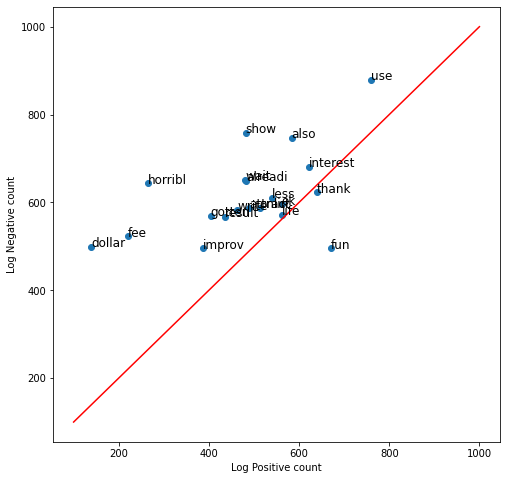

In [221]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])*100

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data])*100

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([100, 1000], [100, 1000], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()

In [223]:
## Compute polarity
## Select words with more than 100 frequency and then compute polarity
review_dum = pos_dum + neg_dum
# Start with something simple  - Just multiply by (n1 + n2)
scaler = m_neg + m_pos

polar_data = {}
for words in review_dum:
    score = scaler*(freqs_scaled[(words,1)] + freqs_scaled[(words,0)])
    polar_data[words] = score

KeyError: ('explan', 1)